## Fire Detection Model (Full Practical Example)

## Create Random Dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:

num_samples = 600

# Normal environment readings
normal_data = np.random.normal(loc=[30, 5, 2, 40], scale=[3, 1, 0.5, 5], size=(300, 4))
normal_labels = np.zeros(300)

# Fire environment readings (higher temp, smoke, CO, lower humidity)
fire_data = np.random.normal(loc=[70, 20, 15, 20], scale=[5, 3, 2, 4], size=(300, 4))
fire_labels = np.ones(300)

# Combine
X = np.vstack([normal_data, fire_data])
y = np.hstack([normal_labels, fire_labels])


In [4]:
X

array([[31.26106833,  5.71459014,  2.05573455, 38.15041365],
       [32.16467326,  4.665387  ,  1.47374694, 45.83521349],
       [29.16165609,  4.93379857,  1.7166705 , 48.41429441],
       ...,
       [75.64971941, 17.97337921, 16.30392781, 19.38155396],
       [67.53490343, 19.81262074, 16.13815527, 16.33562409],
       [72.87426789, 18.32229623, 16.72120819, 17.44267331]])

In [5]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:

df = pd.DataFrame(X, columns=["sensor1_temp", "sensor2_smoke", "sensor3_CO", "sensor4_humidity"])
df["label"] = y

print("Sample Data:")
df.head()

Sample Data:


,sensor1_temp,sensor2_smoke,sensor3_CO,sensor4_humidity,label
0,31.261068,5.714590,2.055735,38.150414,0.0
1,32.164673,4.665387,1.473747,45.835213,0.0
2,29.161656,4.933799,1.716671,48.414294,0.0
3,34.906609,4.310042,2.533187,42.558197,0.0
4,33.627203,6.111204,2.484181,44.570527,0.0


In [7]:
!pip install -q scikit-learn --break-system-packages

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=42).reset_index(drop=True)

df_shuffled.head()

,sensor1_temp,sensor2_smoke,sensor3_CO,sensor4_humidity,label
0,29.165510,6.023097,2.157277,38.943644,0.0
1,64.572852,20.856663,14.012164,25.299793,1.0
2,72.952647,23.372174,17.656453,21.486559,1.0
3,31.384195,5.034298,2.420415,40.078080,0.0
4,31.114802,6.168858,1.840520,39.548094,0.0


In [9]:
X = df.drop("label", axis=1)
y = df["label"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[-1.27728297, -1.00802418, -0.83768701,  0.3646042 ],
       [-0.74141249, -0.81399066, -0.87523668,  0.43939873],
       [-0.87355438, -0.73574064, -1.03363299,  0.6657431 ],
       ...,
       [-1.19513553, -0.98508022, -0.93128259,  0.61424842],
       [ 0.9445494 ,  0.72177992,  1.18323921, -0.63371817],
       [-1.00603239, -1.08999009, -0.99168419,  0.91502099]])

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
model.fit(X_train_scaled, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# Predictions
# ------------------------------
y_train_pred = model.predict(X_train_scaled) #X_test

In [17]:
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       225
         1.0       1.00      1.00      1.00       225

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [18]:
y_test_pred = model.predict(X_test_scaled) #X_test

In [19]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        75
         1.0       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



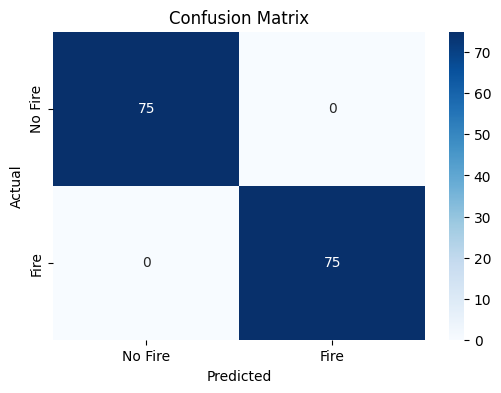

In [21]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Fire", "Fire"],
            yticklabels=["No Fire", "Fire"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
import joblib

# Save model & scaler
joblib.dump(model, "fire_detection_model.pkl")
joblib.dump(scaler, "fire_detection_scaler.pkl")

['fire_detection_scaler.pkl']